In [1]:
import numpy as np
import cv2
from IPython import display
from pynq import Overlay
from pynq import allocate

In [2]:
# load the IP
ol = Overlay("./imageIO_test_v2.bit")
ip_imageIO = ol.imageIO_test_0

In [3]:
# this function just cut the frame currently
def convertResolution(inFrame, height, width):
    outFrame = np.zeros((height, width, 3), dtype=np.uint8)
    outFrame = inFrame[0:height, 0:width]
    return outFrame

In [4]:
def Start():
    print("start")

    # set video resource
    cap = cv2.VideoCapture(-1)
    
    # allcate array
    image_in_array = allocate(shape=(112, 112, 3), dtype=np.uint8)
    image_out_array = allocate(shape=(112, 112, 3), dtype=np.uint8)

    try:
        ret, frame = cap.read()
        
        # read frame by frame
        while (ret == True):
            # reshape the frame into 112x112
            fframe = convertResolution(frame, 112, 112)
            
            image_in_array[:] = np.array(fframe)
            
            # run the IP
            # This IP sets the blue channel to 0
            ip_imageIO.write(0x10, image_in_array.device_address)
            ip_imageIO.write(0x1C, image_out_array.device_address)
            ip_imageIO.write(0x00, 0x01)
            while (ip_imageIO.read(0x00) & 0x4) == 0x0:
                continue

            fframe = image_out_array
                
            # some black magic
            _, ret_array = cv2.imencode('.jpg', fframe)
            i = display.Image(data=ret_array)
            display.display(i)
            display.clear_output(wait=True)
            
            # read next frame
            ret, frame = cap.read()
            
    except KeyboardInterrupt:
        cap.release()
        print("Released Video Resource")
    pass

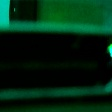

In [ ]:
Start()